<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2196301492.py:21: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Input, $f(\mathbf{x})$')
/tmp/ipython-input-2196301492.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


101
50
105
256


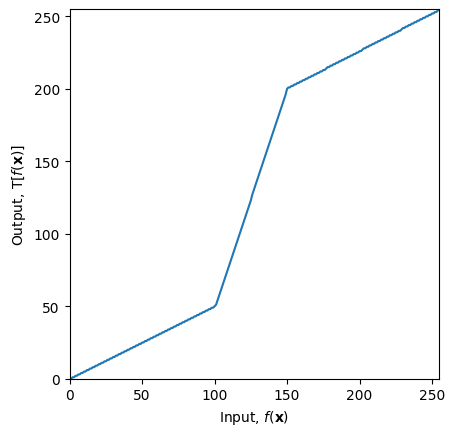

In [ ]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()